In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df_train = pd.read_csv('train.csv')
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Applying ticket number to Titanic Data

In [4]:
def ticket(X):
    uniq_ticket_numbers = ['A', 'P', 'S', '1', '3', '2', 'C', '7', 'W', '4', 'F', 'L', '9',
       '6', '5', '8']
    uniq_ticket_length = [ 9,  8, 16,  6,  5,  7,  4, 10, 13, 15, 12, 11, 17, 18,  3]
    # Grouping the ticket data according to first chr and the length of the ticket number
    X['Ticket_search'] = X['Ticket'].apply(lambda x:x[0])
    X['Ticket_length'] = X['Ticket'].apply(len)
    # Manual onehot encoding
    for i in uniq_ticket_numbers:
        X['ticket_number'+i] = X['Ticket_search']==i
    for i in uniq_ticket_length:    
        X['ticket_length'+str(i)] = X['Ticket_length']==i
    X = X.drop(['Ticket_search'], 1)
    X = X.drop(['Ticket_length'], 1)
    X = X.drop(['Ticket'], 1)
    return X

### Joining SibSp and Parch

In [5]:
def family (X):
    X['Family'] = X['SibSp'] + X['Parch']
    X=X.drop('SibSp', axis=1)
    X=X.drop('Parch', axis=1)
    return X

### Applying starboard/ port, deck level and location criteria

In [6]:
def cabin_info (X):
    # Splitting the cabin information
    X['Cabin_number'] = X.Cabin.str.extract(r'([\d]+)',expand=False)
    X['Cabin_letter'] = X.Cabin.str.replace('\d+', '')
    X['Cabin_letter'] = X['Cabin_letter'].str[0]
    X['Cabin_number'] = X['Cabin_number'].dropna() 
    X['Cabin_number'] = X['Cabin_number'].astype('float')
    # Splitting the cabin number to port and starboard
    X['Starboard'] = X['Cabin_number']%2
    # Splitting the deck according to the location (aft, bow, center)
    X['Cabin_loc'] = pd.cut(X['Cabin_number'], [0,50,100,150], labels=['aft', 'center', 'bow'])
    X = X.drop(['Cabin','Cabin_number'], 1)
    # Manual onehotencoding to the cabin features
    uniq_cabin_letters = ['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']
    uniq_cabin_locs = ['aft', 'center', 'bow']
    uniq_starboard = [1.,  0.]
    for i in uniq_cabin_letters:
        X['Cabin_letter'+i] = X['Cabin_letter']==i
    for i in uniq_cabin_locs:
        X['Cabin_loc'+i] = X['Cabin_loc']==i
    for i in uniq_starboard:
        X['Starboard'+str(i)] = X['Starboard']==i
    X = X.drop(['Cabin_letter'], 1)
    X = X.drop(['Cabin_loc'], 1)
    X = X.drop(['Starboard'], 1)
    return X

### Processing the functions

In [7]:
def process (X):
    
    include = ['Pclass','Sex', 'Age','Ticket','Cabin','Fare', 'SibSp','Parch','Embarked']       
    X = X[include]
    X = ticket(X)
    X = family(X)
    X = cabin_info(X)
    X['Sex'] = X['Sex']=='male'
    X['Embarked_s'] = X['Embarked']=='S'
    X['Embarked_c'] = X['Embarked']=='C'
    X=X.drop('Embarked', axis=1)
    X['Age'] = X['Age'].fillna(29)
    X['Fare'] = X['Fare'].fillna(14.454200)   
    return X

### Splitting the data

In [8]:
df_train = pd.read_csv('train.csv')
X = process(df_train)
y = df_train['Survived']

C:\Users\AA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\AA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
X.head(5)

,Pclass,Sex,Age,Fare,ticket_numberA,ticket_numberP,ticket_numberS,ticket_number1,ticket_number3,ticket_number2,...,Cabin_letterB,Cabin_letterF,Cabin_letterT,Cabin_locaft,Cabin_loccenter,Cabin_locbow,Starboard1.0,Starboard0.0,Embarked_s,Embarked_c
0,3,True,22.0,7.2500,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,False,38.0,71.2833,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,3,False,26.0,7.9250,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,False,35.0,53.1000,False,False,False,True,False,False,...,False,False,False,False,False,True,True,False,True,False
4,3,True,35.0,8.0500,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [10]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'ticket_numberA', 'ticket_numberP',
       'ticket_numberS', 'ticket_number1', 'ticket_number3', 'ticket_number2',
       'ticket_numberC', 'ticket_number7', 'ticket_numberW', 'ticket_number4',
       'ticket_numberF', 'ticket_numberL', 'ticket_number9', 'ticket_number6',
       'ticket_number5', 'ticket_number8', 'ticket_length9', 'ticket_length8',
       'ticket_length16', 'ticket_length6', 'ticket_length5', 'ticket_length7',
       'ticket_length4', 'ticket_length10', 'ticket_length13',
       'ticket_length15', 'ticket_length12', 'ticket_length11',
       'ticket_length17', 'ticket_length18', 'ticket_length3', 'Family',
       'Cabin_letterC', 'Cabin_letterE', 'Cabin_letterG', 'Cabin_letterD',
       'Cabin_letterA', 'Cabin_letterB', 'Cabin_letterF', 'Cabin_letterT',
       'Cabin_locaft', 'Cabin_loccenter', 'Cabin_locbow', 'Starboard1.0',
       'Starboard0.0', 'Embarked_s', 'Embarked_c'],
      dtype='object')

In [11]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate

In [12]:
df_train['Survived'].mean()

0.3838383838383838

In [13]:
clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, class_weight='balanced', criterion='entropy')

In [14]:
test_sc = cross_validate(estimator=clf, X=X, y=y, cv=10, return_train_score=True)

In [15]:
test_sc

{'fit_time': array([0.09078503, 0.0797565 , 0.08078384, 0.09571242, 0.09674072,
        0.08773232, 0.07878923, 0.07878971, 0.07981682, 0.07280445]),
 'score_time': array([0.00499201, 0.00502157, 0.00598979, 0.00800872, 0.00799274,
        0.00598383, 0.00598407, 0.00598335, 0.00498652, 0.00498629]),
 'test_score': array([0.78888889, 0.76666667, 0.76404494, 0.78651685, 0.82022472,
        0.7752809 , 0.83146067, 0.82022472, 0.84269663, 0.85227273]),
 'train_score': array([0.86267166, 0.85393258, 0.87281796, 0.86159601, 0.84663342,
        0.8553616 , 0.85785536, 0.86783042, 0.86284289, 0.85429639])}

In [16]:
test_sc['test_score'].mean()

0.804827772103053

In [17]:
test_sc['train_score'].mean()

0.8595838289097445

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
grid_s = GridSearchCV(estimator=clf, param_grid={'min_samples_leaf':(range(1,10)), 'class_weight':['balanced'],'max_features':(range(35,44))})

In [20]:
grid_s.fit(X, y)

C:\Users\AA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [21]:
grid_s.best_params_

{'class_weight': 'balanced', 'max_features': 43, 'min_samples_leaf': 4}

In [22]:
grid_s.cv_results_

{'mean_fit_time': array([0.15326413, 0.1881721 , 0.12666289, 0.13762172, 0.12401326,
        0.11900663, 0.14527949, 0.10838707, 0.1030577 , 0.14460452,
        0.14524031, 0.14760462, 0.15226992, 0.12998533, 0.12932404,
        0.13596916, 0.10737896, 0.12631965, 0.16956687, 0.13530453,
        0.1319708 , 0.14628577, 0.13996108, 0.12566304, 0.14229488,
        0.12932261, 0.12831283, 0.17916473, 0.15126069, 0.15259202,
        0.1412882 , 0.14127771, 0.15492288, 0.12733603, 0.11534794,
        0.124698  , 0.15325912, 0.18119438, 0.13630478, 0.13231627,
        0.14427924, 0.1419549 , 0.14429156, 0.1376311 , 0.12832403,
        0.18084017, 0.17253017, 0.15824564, 0.15692353, 0.14328218,
        0.14893468, 0.14893508, 0.13065076, 0.1299785 , 0.16156499,
        0.16687544, 0.1765275 , 0.15126483, 0.15526263, 0.1416177 ,
        0.14661272, 0.13962468, 0.119337  , 0.18418892, 0.16090457,
        0.1579229 , 0.15626764, 0.13663507, 0.13696496, 0.13530374,
        0.14062937, 0.14293345,

In [23]:
df_pred =grid_s.predict(X)

In [24]:
df_train['Predicted'] = df_pred

In [25]:
df_train['Error'] =df_train['Predicted'] != df_train['Survived']

Error
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Pclass, dtype: object

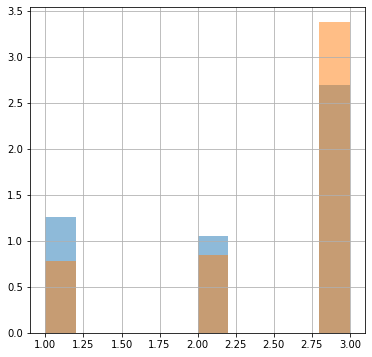

In [26]:
df_train.groupby(['Error'])['Pclass'].hist(figsize=(6,6), alpha=0.5, density=True)

In [28]:
from ipywidgets import interact

In [29]:
@interact
def ortalama(group1 = df_train.columns.to_list()):
    display(df_train.groupby(['Error'])[group1].hist(figsize=(6,6), alpha=0.5, density=True))

interactive(children=(Dropdown(description='group1', options=('PassengerId', 'Survived', 'Pclass', 'Name', 'Se…

In [30]:
test_sc['test_score'].mean()

0.804827772103053

In [31]:
test_sc['train_score'].mean()

0.8595838289097445

In [32]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [33]:
grid_s.fit(X,y)

C:\Users\AA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [34]:
clf.score(X,y)

0.8574635241301908

In [35]:
df_test=pd.read_csv('test.csv')

In [36]:
predict = grid_s.predict(process(df_test))

C:\Users\AA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
predict = grid_s.predict(process(df_test))

C:\Users\AA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
df_test['Survived'] = predict

In [39]:
df_test[['PassengerId','Survived']].to_csv('dosya', index=False)

# Clustering

In [40]:
df_train = pd.read_csv('train.csv')
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [42]:
col = ColumnTransformer([
    ('encode', OneHotEncoder(sparse=False), ['Pclass','Sex','SibSp','Parch','Embarked']),
    ('scale', MinMaxScaler(), ['Age','Fare'])
])

In [43]:
X = col.fit_transform(df_train)

In [44]:
from sklearn.cluster import KMeans

In [45]:
kmeans = KMeans()
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
cluster = kmeans.predict(X)

In [47]:
import seaborn as sns

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

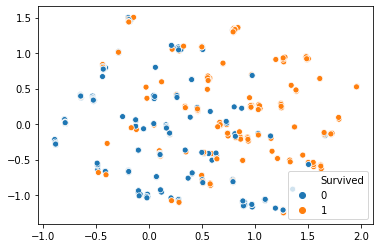

In [50]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_train['Survived'])

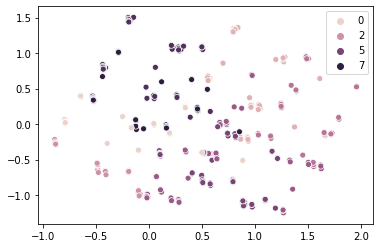

In [51]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster, cmap = 'jet')

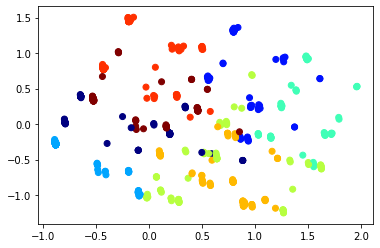

In [52]:
plt.scatter(x=X_pca[:,0], y=X_pca[:,1], c=cluster, cmap = 'jet')

In [53]:
@interact
def clustering (k=(2,9,1)):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    cluster = kmeans.predict(X)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(12,8))
    plt.scatter(x=X_pca[df_train['Survived']==0,0], y=X_pca[df_train['Survived']==0,1], c=cluster[df_train['Survived']==0],
                marker='*', cmap = 'jet')
    plt.scatter(x=X_pca[df_train['Survived']==1,0], y=X_pca[df_train['Survived']==1,1], c=cluster[df_train['Survived']==1], cmap = 'jet')

interactive(children=(IntSlider(value=5, description='k', max=9, min=2), Output()), _dom_classes=('widget-inte…

In [54]:
@interact
def ortalama(group1 = df_train.columns.to_list(), category = df_train.columns.to_list()):
    display(df_train.groupby([group1,category])['Survived'].value_counts())

interactive(children=(Dropdown(description='group1', options=('PassengerId', 'Survived', 'Pclass', 'Name', 'Se…

In [55]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
